In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})
plt.rc('figure', figsize=(20, 10))
import numpy as np
import utils;reload(utils)
from utils import *
from keras.layers import Merge, Permute
import pdb
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import rankdata

Using Theano backend.


In [2]:
data_dir = 'data_new/'
action_cate8 = pd.read_csv(data_dir+"train/action_type_valid.csv", parse_dates=["date"])
users = pd.read_csv(data_dir+"JData_User.csv", encoding='gbk')

# pos04 = pd.read_csv("data/train/positive04.csv", parse_dates=["time_x", "time_y"])
# pos03 = pd.read_csv("data/train/positive03.csv", parse_dates=["time_x", "time_y"])
# all_pos = pd.concat((pos03, pos04))

In [3]:
all_pos = pd.read_csv(data_dir+"train/positive_valid.csv", parse_dates=["date_x", "date_y"])

In [4]:
cv_negative = pd.read_csv(data_dir+"train/cv_negative_valid.csv", 
    parse_dates=["date_x", "date_y"], header=0)

购买了商品的用户在购买前和所购买的商品的交互记录

In [6]:
all_pos[(all_pos.sku_id_x==all_pos.sku_id_y)&(all_pos.action_type_1>0)]\
              .groupby(['user_id', 'sku_id_x', 'date_x']).apply(len).sort_values(ascending=False)

user_id   sku_id_x  date_x    
239958.0  18412     2016-03-12    10
221274.0  152872    2016-03-25    10
292733.0  160750    2016-04-01    10
217870.0  32465     2016-04-05    10
240316.0  103652    2016-03-29    10
254109.0  90621     2016-03-11    10
251399.0  40336     2016-04-07    10
296794.0  166707    2016-03-24    10
264560.0  68615     2016-03-15    10
286688.0  152478    2016-04-08     9
231220.0  42199     2016-03-14     9
204574.0  32465     2016-03-29     9
263425.0  69858     2016-03-12     9
269983.0  160209    2016-04-01     9
214697.0  67924     2016-04-11     9
241738.0  81462     2016-03-29     9
288462.0  109728    2016-03-21     9
206714.0  68615     2016-03-30     9
223390.0  85557     2016-04-02     9
214181.0  57161     2016-03-15     9
251381.0  61531     2016-03-12     9
246173.0  52343     2016-03-15     9
244060.0  61226     2016-03-15     9
300147.0  109728    2016-03-21     9
305034.0  57161     2016-04-08     9
232833.0  32465     2016-03-25     9
264634.

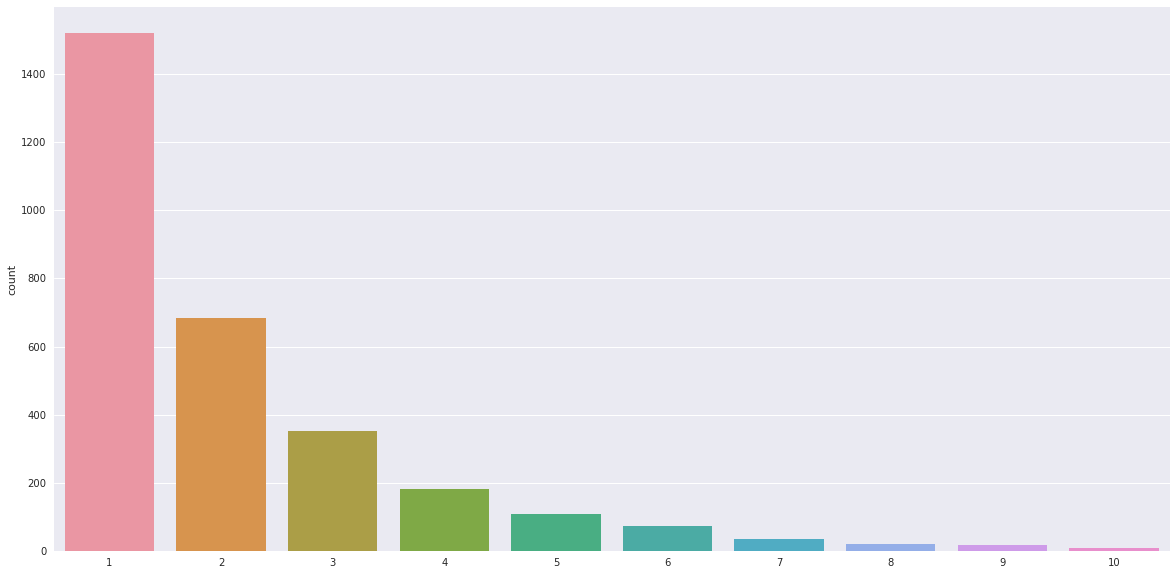

In [9]:
sns.countplot(all_pos[(all_pos.sku_id_x==all_pos.sku_id_y)&(all_pos.action_type_1>0)]\
              .groupby(['user_id', 'sku_id_x', 'date_x']).apply(len))

没有购买的用户在10天内有过交互的商品，按交互天数倒排

In [7]:
cv_negative[cv_negative.action_type_1>0]\
              .groupby(['user_id', 'sku_id_y', 'date_x']).apply(len).sort_values(ascending=False)

user_id   sku_id_y  date_x             
293301.0  134619    2016-04-11 10:00:00    10
217870.0  32465     2016-04-11 10:00:00    10
305034.0  57161     2016-04-11 10:00:00    10
251399.0  40336     2016-04-11 10:00:00    10
303274.0  31662     2016-04-11 10:00:00    10
255149.0  18103     2016-04-11 10:00:00    10
220656.0  40336     2016-04-11 10:00:00     9
274959.0  18412     2016-04-11 10:00:00     9
          63006     2016-04-11 10:00:00     9
201441.0  123578    2016-04-11 10:00:00     9
264634.0  63006     2016-04-11 10:00:00     9
293488.0  14433     2016-04-11 10:00:00     9
242658.0  40336     2016-04-11 10:00:00     9
286688.0  152478    2016-04-11 10:00:00     9
234244.0  61531     2016-04-11 10:00:00     9
274217.0  153698    2016-04-11 10:00:00     9
275994.0  39830     2016-04-11 10:00:00     9
254833.0  153551    2016-04-11 10:00:00     9
234701.0  31662     2016-04-11 10:00:00     9
239118.0  122664    2016-04-11 10:00:00     9
257111.0  23696     2016-04-11 10:00:00 

/root/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


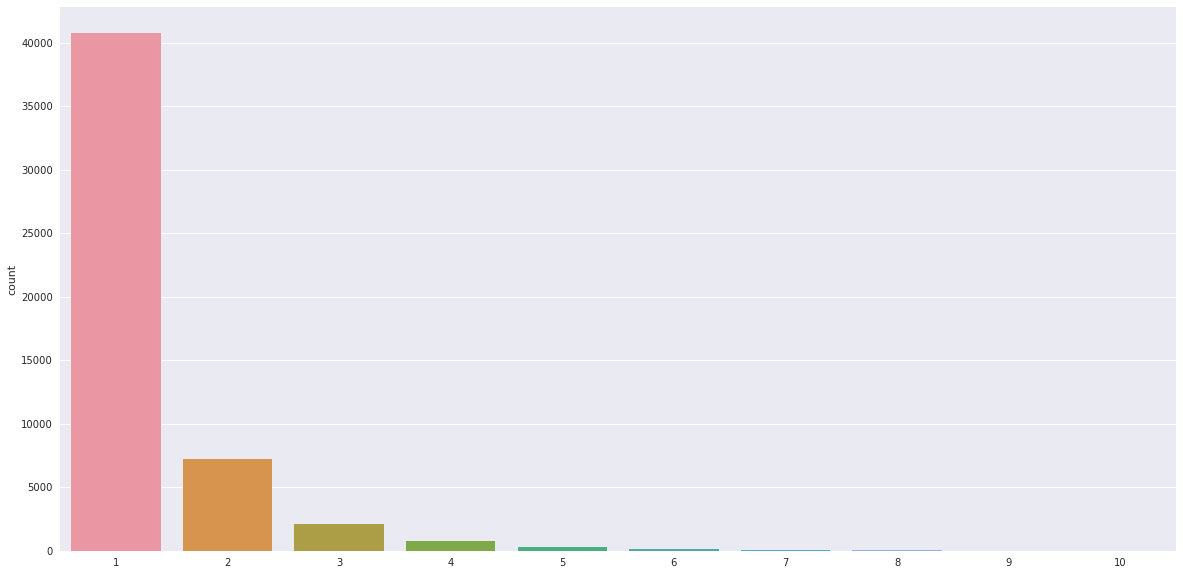

In [8]:
sns.countplot(cv_negative[cv_negative.action_type_1>0]\
              .groupby(['user_id', 'sku_id_y', 'date_x']).apply(len))

购买了商品的用户在10天内有过交互的商品，按交互天数倒排

In [41]:
all_pos\
              .groupby(['user_id', 'sku_id_x', 'sku_id_y', 'date_x']).apply(len).sort_values(ascending=False)

user_id   sku_id_x  sku_id_y  date_x    
221274.0  152872    152872    2016-03-25    10
279823.0  91957     40336     2016-03-12    10
244336.0  96112     41101     2016-03-31    10
296794.0  166707    166707    2016-03-24    10
229754.0  147796    50688     2016-03-11    10
254109.0  90621     90621     2016-03-11    10
238000.0  63006     164258    2016-04-07    10
286809.0  31662     31662     2016-03-31    10
251399.0  40336     40336     2016-04-07    10
264560.0  68615     68615     2016-03-15    10
206871.0  126906    126906    2016-03-15    10
239958.0  18412     18412     2016-03-12    10
287233.0  12564     63006     2016-04-08    10
217870.0  32465     32465     2016-04-05    10
240316.0  103652    103652    2016-03-29    10
292733.0  160750    160750    2016-04-01    10
241738.0  81462     81462     2016-03-29     9
279823.0  91957     62863     2016-03-12     9
248325.0  41101     108399    2016-03-15     9
239958.0  18412     11061     2016-03-12     9
231220.0  42199    

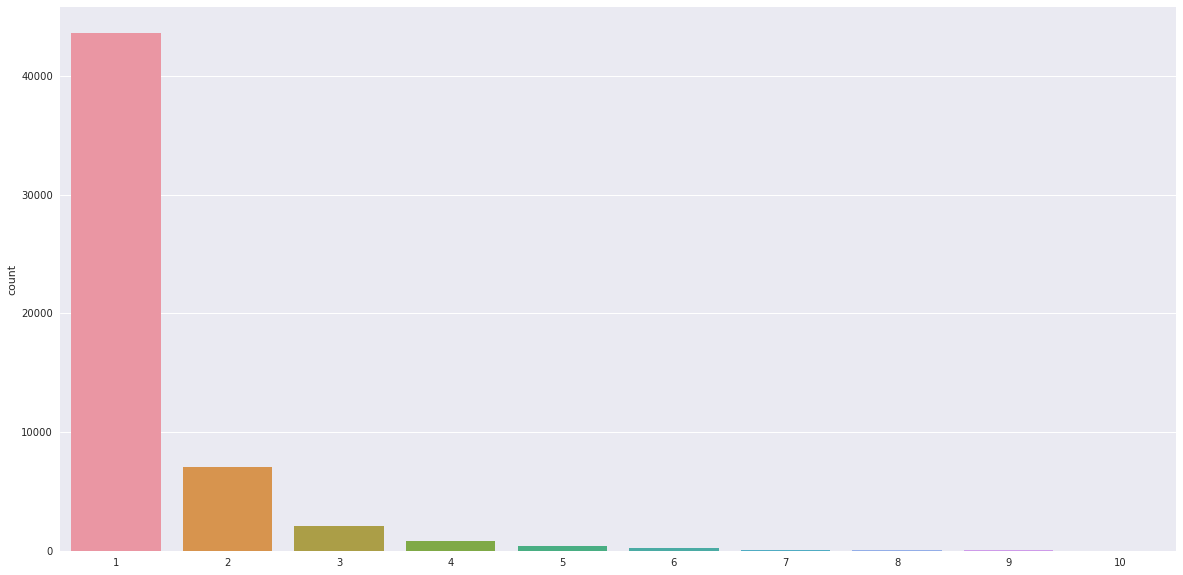

In [27]:
sns.countplot(all_pos\
              .groupby(['user_id', 'sku_id_y', 'date_x']).apply(len))

## 测试集

In [42]:
import datetime
test_df = pd.DataFrame(action_cate8[action_cate8.date >= '20160406'].user_id.unique(), 
                       columns=['user_id'])
test_df['date'] = datetime.datetime(2016, 4, 16)
test_df['sku_id'] = 0
test_df['window_start'] = '20160406'
test_df['window_end'] = '20160416'

test_df = pd.merge(test_df, action_cate8[action_cate8.date >= '20160406'], on = 'user_id')

In [44]:
test_df\
              .groupby(['user_id', 'sku_id_y', 'date_x']).apply(len).sort_values(ascending=False)

user_id   sku_id_y  date_x    
293301.0  134619    2016-04-16    10
255149.0  18103     2016-04-16    10
213460.0  132417    2016-04-16    10
286259.0  15661     2016-04-16    10
268238.0  103652    2016-04-16    10
228616.0  169819    2016-04-16    10
223409.0  84389     2016-04-16    10
261135.0  52343     2016-04-16    10
272427.0  134619    2016-04-16    10
244677.0  119979    2016-04-16    10
254833.0  153551    2016-04-16    10
240605.0  98253     2016-04-16    10
285404.0  32465     2016-04-16    10
201441.0  123578    2016-04-16    10
213460.0  61531     2016-04-16    10
257040.0  56792     2016-04-16    10
269741.0  81462     2016-04-16    10
257040.0  79520     2016-04-16    10
254332.0  160476    2016-04-16    10
289697.0  147796    2016-04-16    10
279912.0  77837     2016-04-16     9
209474.0  134619    2016-04-16     9
270929.0  14163     2016-04-16     9
207099.0  63006     2016-04-16     9
224294.0  169819    2016-04-16     9
231902.0  63006     2016-04-16     9
270929.